# Housing Price Prediction Model - Boston

This project aims to conduct a regression analysis, a predicting modelling technique to develop a price prediction model for our housing dataset.

## About the Dataset

Boston House Prices Dataset was collected in 1978 and has 506 entries with 14 attributes or features for homes from various suburbs in Boston.

Boston Housing Dataset Attribute Information (in order):<br>
        **CRIM**: per capita crime rate by town<br>
        **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.<br>
        **INDUS**: proportion of non-retail business acres per town<br>
        **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)<br>
        **NOX**: nitric oxides concentration (parts per 10 million)<br>
        **RM**: average number of rooms per dwelling<br>
        **AGE**: proportion of owner-occupied units built prior to 1940<br>
        **DIS**: weighted distances to five Boston employment centres<br>
        **RAD**: index of accessibility to radial highways<br>
        **TAX**: full-value property-tax rate per 10,000 dollars<br>
        **PTRATIO**: pupil-teacher ratio by town<br>
        **Black**: 1000(Bk - 0.63) power 2 where Bk is the proportion of blacks by town<br>
        **LSTAT**: percentage lower status of the population<br>
        **MEDV**: Median value of owner-occupied homes in 1000 s<br>

## Importing Required Libraries

In [3]:
#importing all the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
import xgboost as xgb

In [4]:
# Reading the Data from csv file

db = pd.read_csv("/Users/harshitha/Desktop/Git Projects /Boston Housing/Boston Dataset.csv")

In [5]:
db.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
# Dropping the first column "Unnamed: 0" as it has no significance

db.drop(columns=['Unnamed: 0'], axis=0, inplace=True)
db.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
# # Deploying .decribe() method to obtain aggegated values of numeric columns
# Deploying T attribute to Transpose rows and columns

db.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [8]:
# Checking the datatype of the columns

db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Data Preprocessing

In [9]:
# check for missing values

db.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

**From the above output we can say that there are no missing values in our data**

## Exploratory Data Analysis

### Box Plots

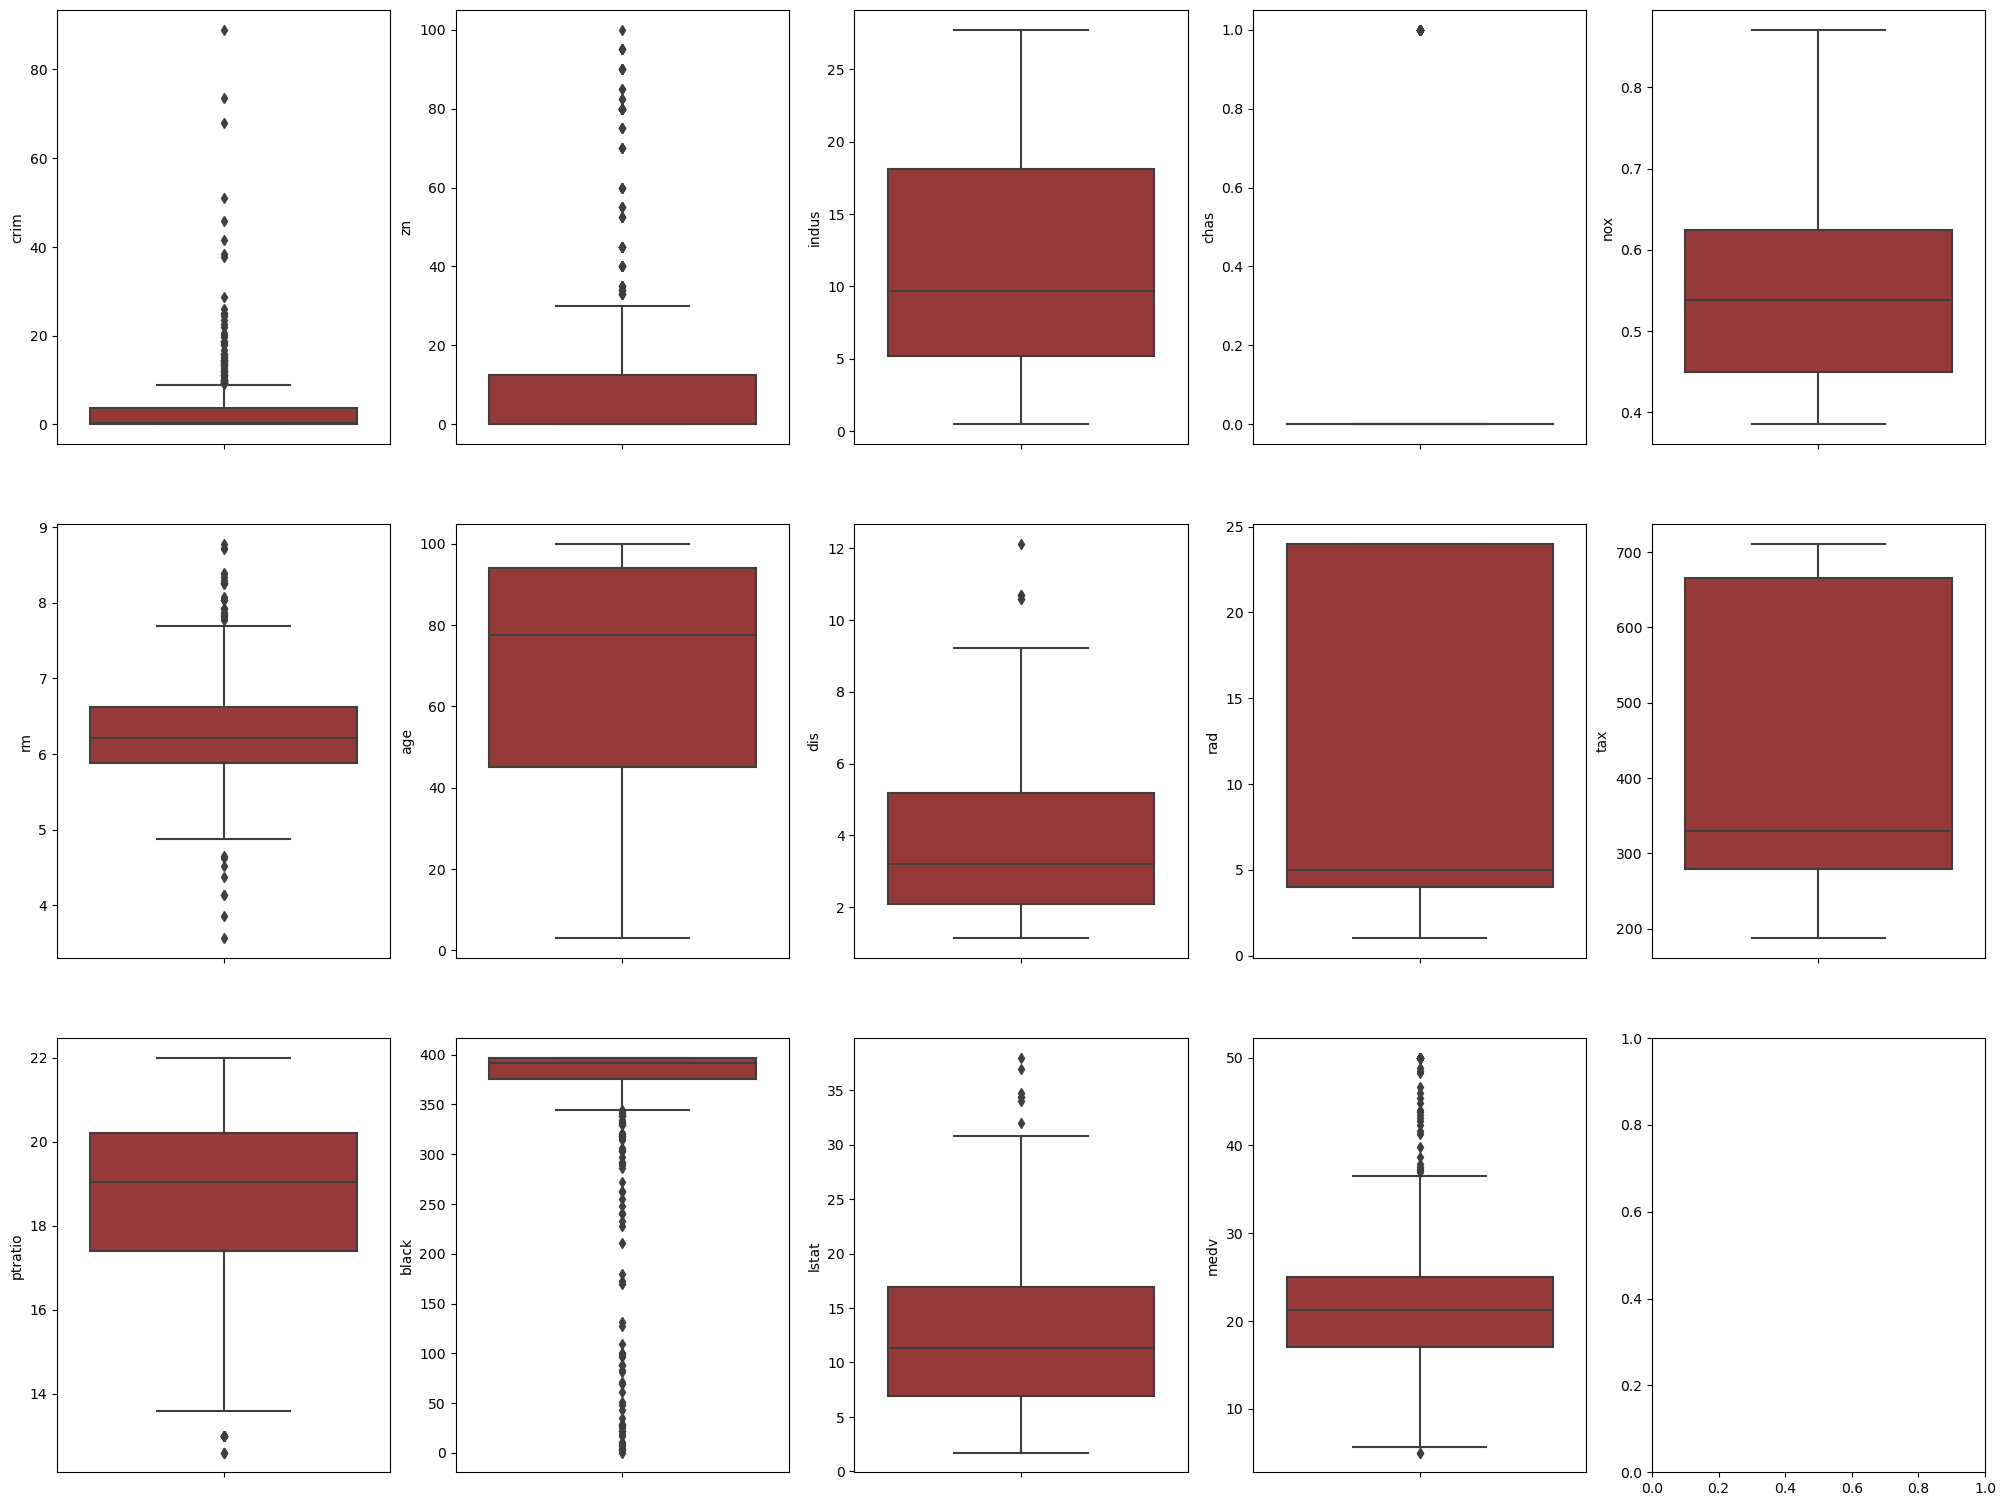

In [10]:
# Creating Box Plots for all the attributes to check if there are any outliers in our data

box_color = 'brown' 
fig, ax = plt.subplots(ncols=5, nrows=3, figsize=(20, 15))
index = 0
ax = ax.flatten()

for col in db.columns:
    sns.boxplot(y=db[col], ax=ax[index], color=box_color)
    index += 1

# Adjusting the layout
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

From the graph, it is clearly seen that there are many outliers in columns namely 
* crim - per capita crime rate by town
* zn - proportion of residential land zoned for lots over 25,000 sq.ft
* black - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

**Now to minimize the impact of these outliers in our data, we will conduct normalization method called min-max scaling. It scales the data in such a way that the outliers have less of an extreme effect on the overall dataset**

The below columns also have some outliers but as much as the above mentioned columns
* rm - average number of rooms per dwelling
* medv - Median value of owner-occupied homes in $1000's 


### Distribution Plots

This will give us an understanding about how our data is spread across different ranges and overall data distribution.

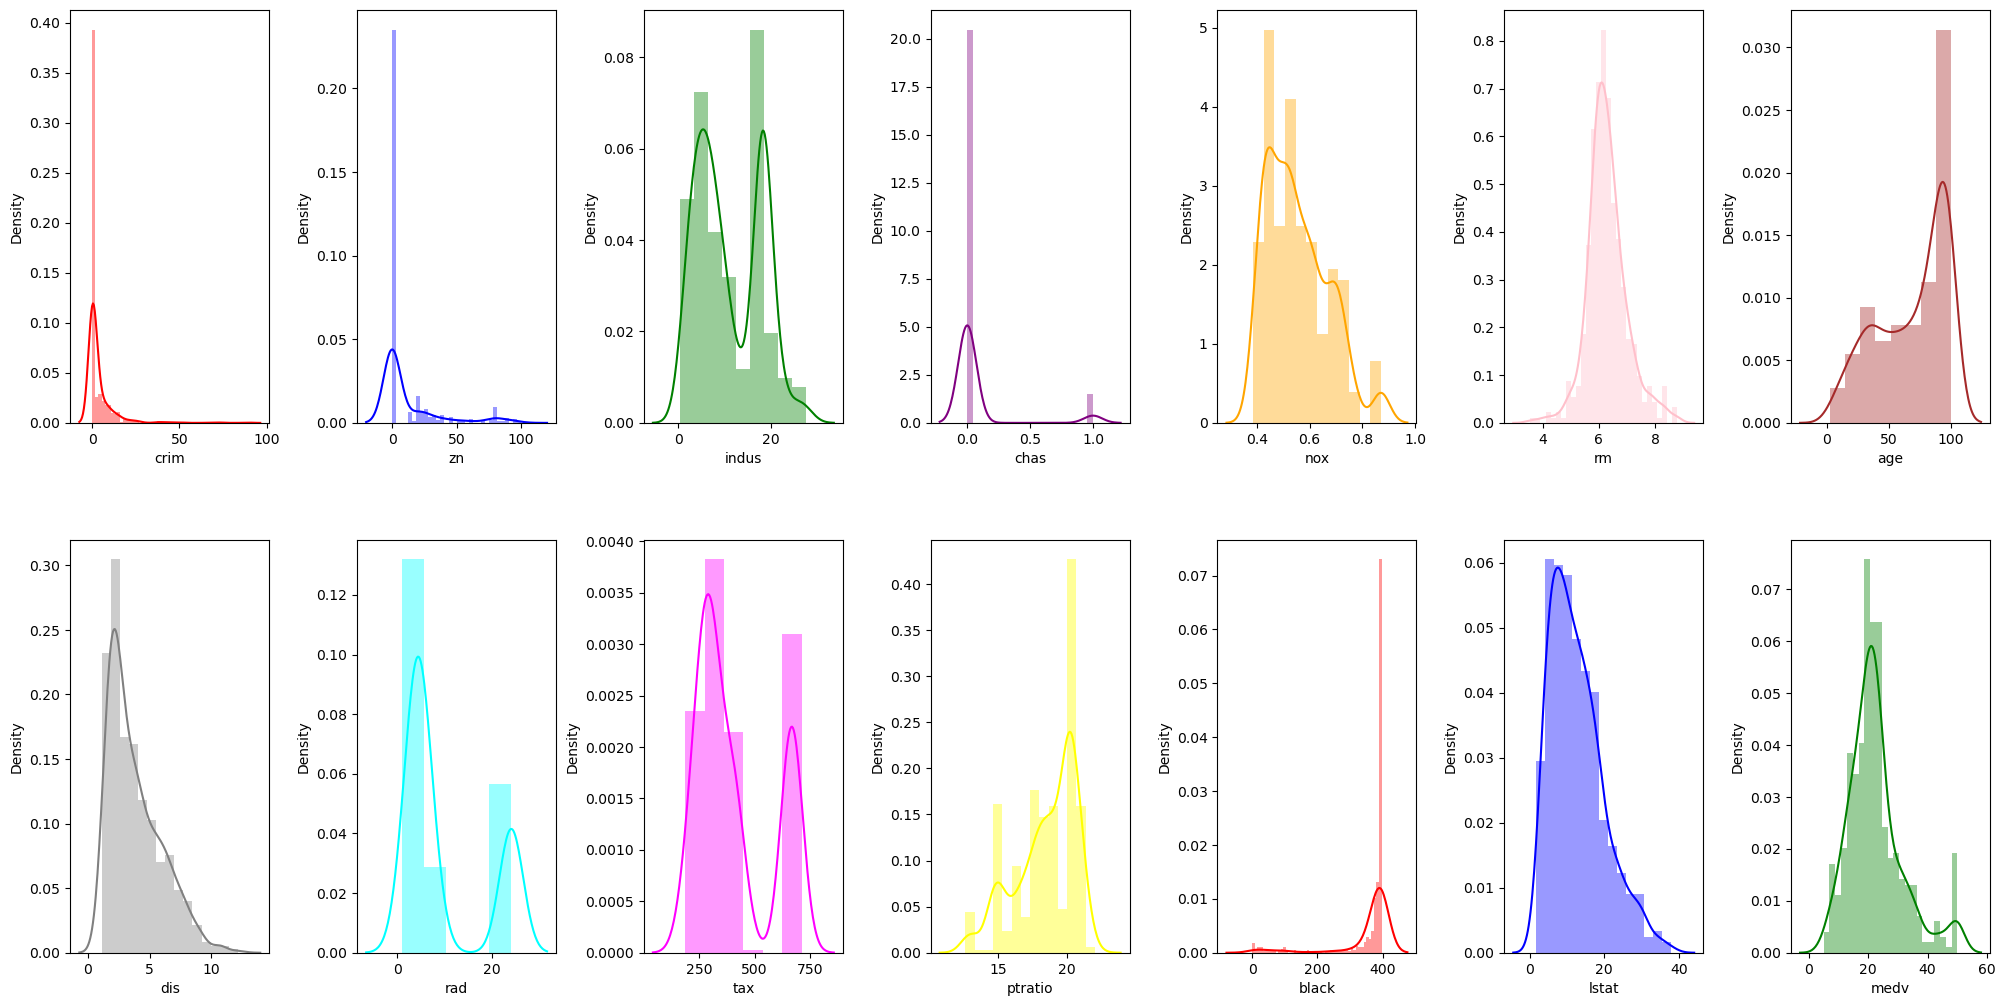

In [11]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'yellow']

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in db.items():
    sns.distplot(value, ax=ax[index], color=colors[index % len(colors)])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

* The columns "crim", "zn", "dis", "nox", and "lstat" are right skewed
* The columns "rm" and "medv" have normally distributed curves
* The range of "tax" and "black" columns are very high 

We will now conduct min-max scaling for "crim", "zn", "black" and "tax" columns


## Normalization: Min-Max Scaling 

Min-Max Scaling is a method of normalization. This scales all the numeric attributes in the range [0, 1] or [-1, 1]. It's done by subtracting the minimum value and dividing by the range of the dataset. 

In [12]:
cols = ['crim', 'zn', 'tax', 'black']
for col in cols:
    # find minimum and maximum of that column
    minimum = min(db[col])
    maximum = max(db[col])
    db[col] = (db[col] - minimum) / (maximum - minimum)

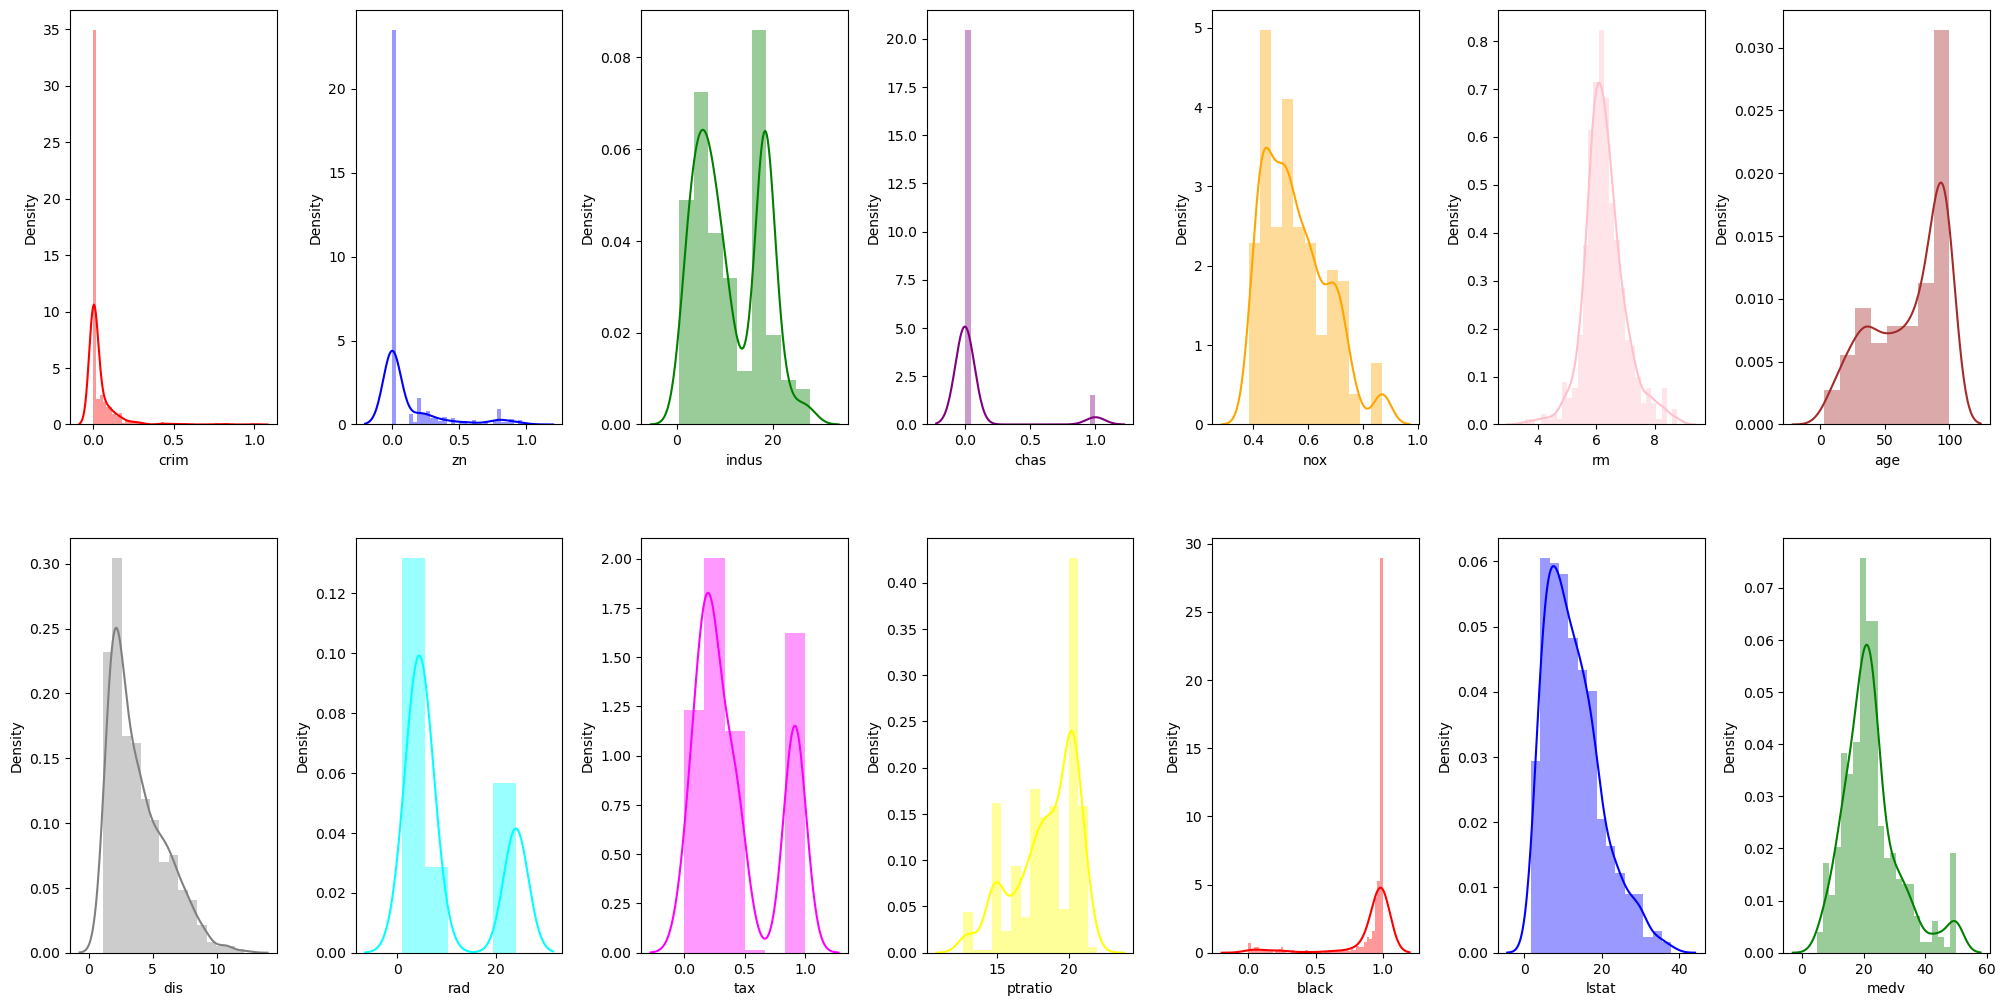

In [13]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'yellow']

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in db.items():
    sns.distplot(value, ax=ax[index], color=colors[index % len(colors)])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

From the above plots we can see that the range has changed to [0,1] for the "crim", "zn", "black" and "tax" columns.

## Standardization

In [14]:
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

#Our Data
scaled_cols = scalar.fit_transform(db[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,crim,zn,tax,black
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [15]:
# Assigning the standardized values in the original data frame

for col in cols:
    db[col] = scaled_cols[col]

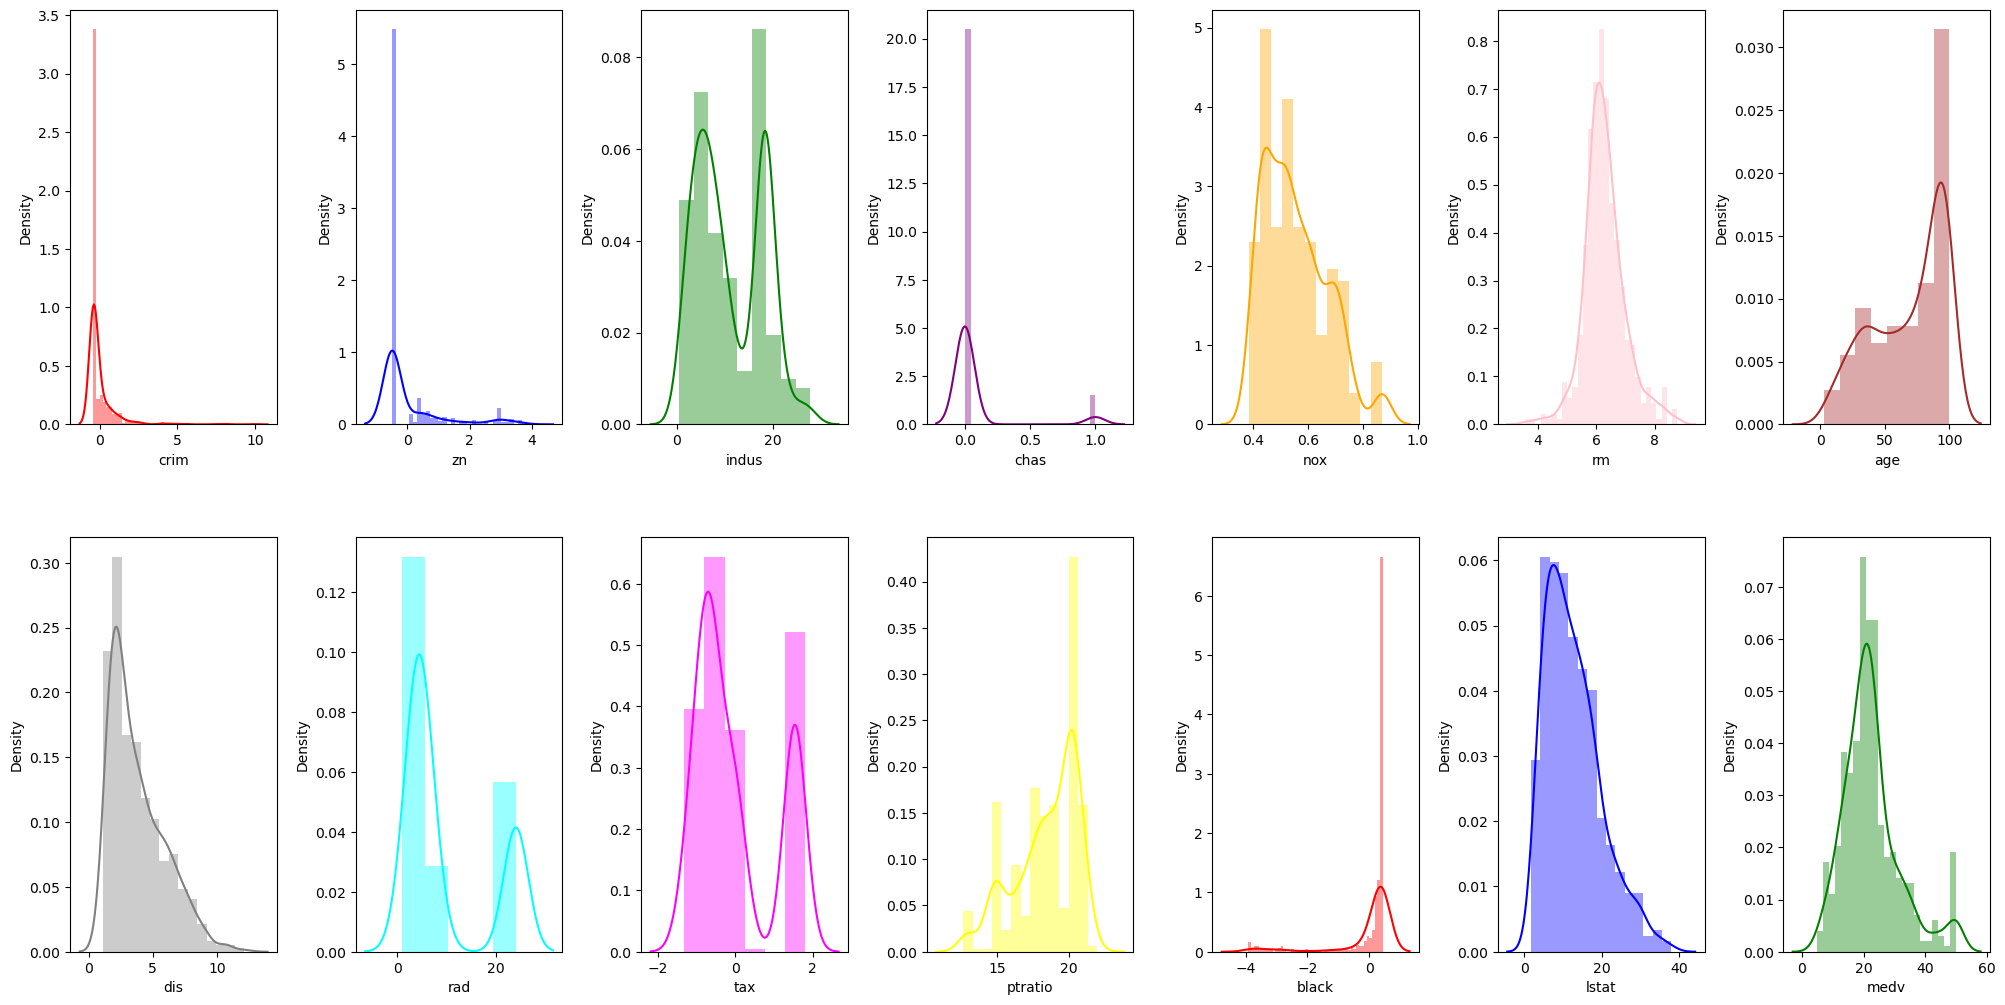

In [16]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'yellow']

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in db.items():
    sns.distplot(value, ax=ax[index], color=colors[index % len(colors)])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

Even though there is no visible normalization in the curve, standardization will improve the overall model 

## Correlation Matrix

**Considering "medv"(median value of owner-occupied homes) as my target variable/dependent variable for Regression Analysis.**

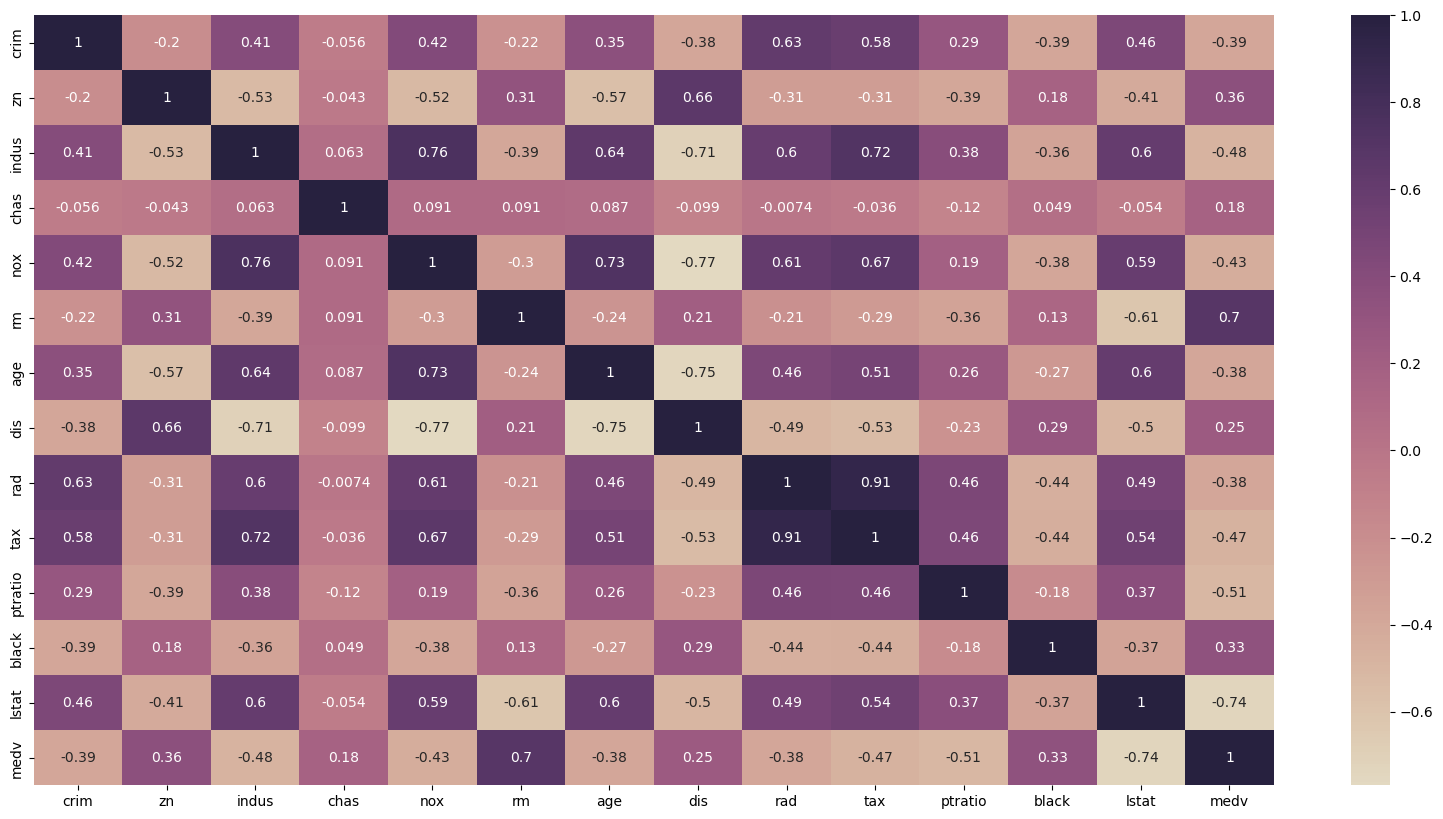

In [17]:
corr = db.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()

From the correlation matrix, we can infer that:

* The 'rm' column (average number of rooms per dwelling) has a relatively strong positive correlation of 0.7 with 'medv'. This means the median value of the houses is directly proportional to number of rooms.
* The 'lstat' column (% lower status of the population) has a strong negative correlation of -0.74 with 'medv'. This means the median value of the houses is inversly proportional to the lower status of the population in an area
* The variables 'rad' (index of accessibility to radial highways) and 'tax' (full-value property-tax rate per 10,000 dollar) have a very high correlation of 0.91 with each other. Given their high intercorrelation, including both the variables in a regression model would not give us the desired ouput. Therefore, we will be ignoring the 'rad' variable for our model.

<Axes: xlabel='lstat', ylabel='medv'>

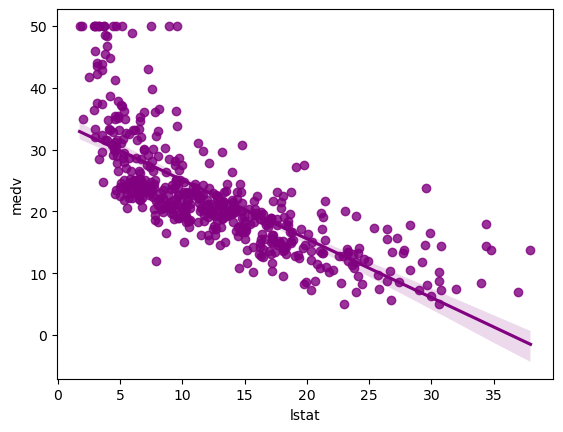

In [18]:
# Displaying the relationship between lstat and medv variable

sns.regplot(y=db['medv'], x=db['lstat'], color='purple')

**We can see that the median value of the houses(medv) is inversly proportional to the lower status of the population in an area(lstat). This means as the value of lstat increases, the medv value decreases**

<Axes: xlabel='rm', ylabel='medv'>

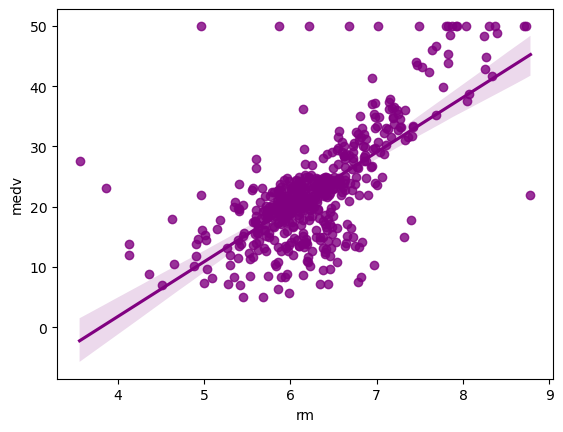

In [19]:
# Displaying the relationship between rm and medv variable

sns.regplot(y=db['medv'], x=db['rm'], color='purple')

**We can see that the median value of the houses(medv) is directly proportional to the number of rooms. This means as the value of rm increases, the medv value also increases**

### Preparing the data for our model by splitting the data

In [20]:
X = db.drop(columns=['medv', 'rad'], axis=1)    # Dataset containing features for our model
y = db['medv']                                  # Target data for our model

## Training the Model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

X = db.drop(columns=['medv', 'rad'], axis=1)    # Dataset containing features for our model
y = db['medv'] 

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Verify the shapes of the datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((404, 12), (102, 12), (404,), (102,))

In [26]:
# Function to train and evaluate a model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = model.score(X_test, y_test)
    
    return {
        'cv_score': np.mean(-cv_score),
        'mse': mse,
        'r2': r2,
        'accuracy': accuracy
    }


## Model Evaluation

In [35]:
# Initializing the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42)
}

# Evaluation
results = {}
for model_name, model in models.items():
    results[model_name] = evaluate_model(model, X_train, y_train, X_test, y_test)

# Convert results to DataFrame 
results_df = pd.DataFrame(results).T

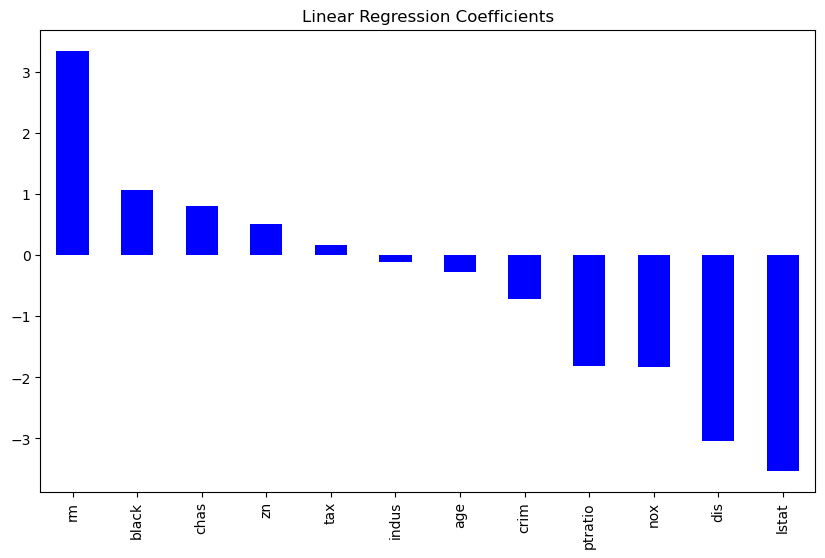

,cv_score,mse,r2,accuracy
Linear Regression,24.331714,26.470946,0.639035,0.639035


In [50]:
# Linear Regression

lg = LinearRegression()
lg.fit(X_train, y_train)
lr_feature_importance = pd.Series(lg.coef_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
lr_feature_importance.plot(kind='bar', title='Linear Regression Coefficients', color='blue')
plt.show()

lg_results = evaluate_model(linear_regression, X_train, y_train, X_test, y_test)
lg_results_df = pd.DataFrame([linear_regression_results], index=['Linear Regression'])
lg_results_df

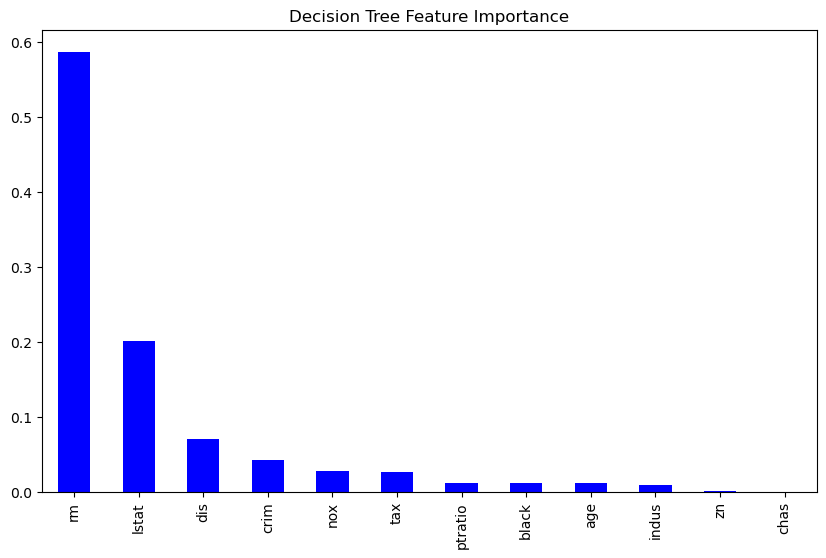

,cv_score,mse,r2,accuracy
Decision Tree,32.003444,10.665588,0.854561,0.854561


In [51]:
# Decision Tree

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_feature_importance = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
dt_feature_importance.plot(kind='bar', title='Decision Tree Feature Importance', color='blue')
plt.show()

dt_results = evaluate_model(decision_tree, X_train, y_train, X_test, y_test)
dt_results_df = pd.DataFrame([decision_tree_results], index=['Decision Tree'])
dt_results_df

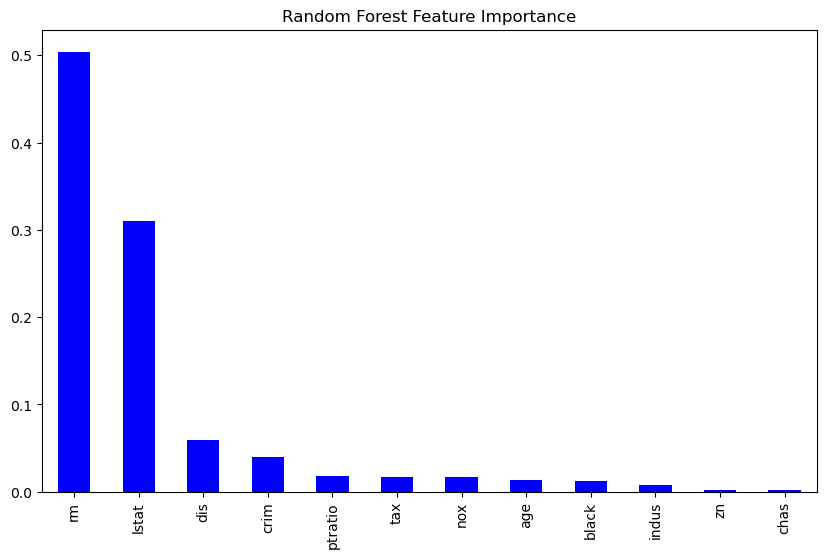

,cv_score,mse,r2,accuracy
Random Forest,14.935086,7.694171,0.89508,0.89508


In [52]:
# Random Forest

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
rf_feature_importance.plot(kind='bar', title='Random Forest Feature Importance', color='blue')
plt.show()

rf_results = evaluate_model(random_forest, X_train, y_train, X_test, y_test)
rf_results_df = pd.DataFrame([random_forest_results], index=['Random Forest'])
rf_results_df

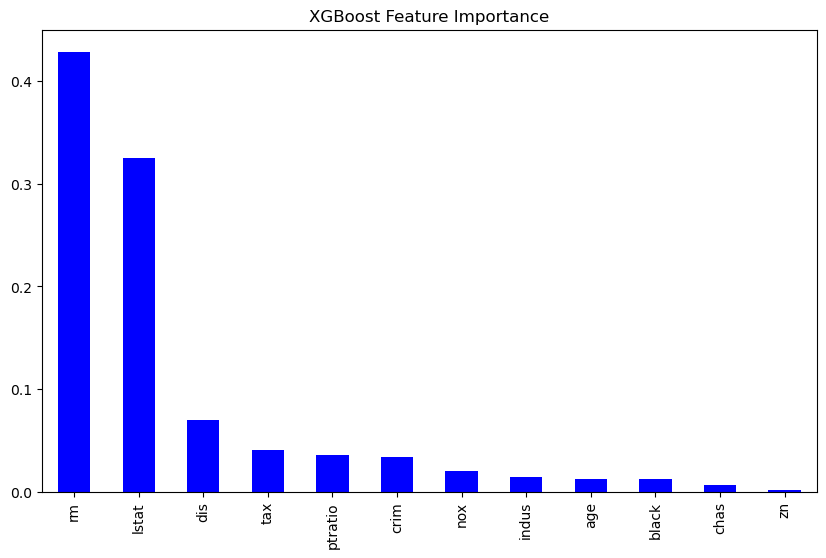

,cv_score,mse,r2,accuracy
XGBoost,13.979612,7.147339,0.902537,0.902537


In [53]:
# XGBoost

xg = xgb.XGBRegressor(random_state=42, n_jobs=1)  # setting n_jobs to 1 to limit CPU usage
xg.fit(X_train, y_train)
xgb_feature_importance = pd.Series(xg.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
xgb_feature_importance.plot(kind='bar', title='XGBoost Feature Importance', color='blue')
plt.show()

xg_results = evaluate_model(xgboost, X_train, y_train, X_test, y_test)
xg_results_df = pd.DataFrame([xgboost_results], index=['XGBoost'])
xg_results_df

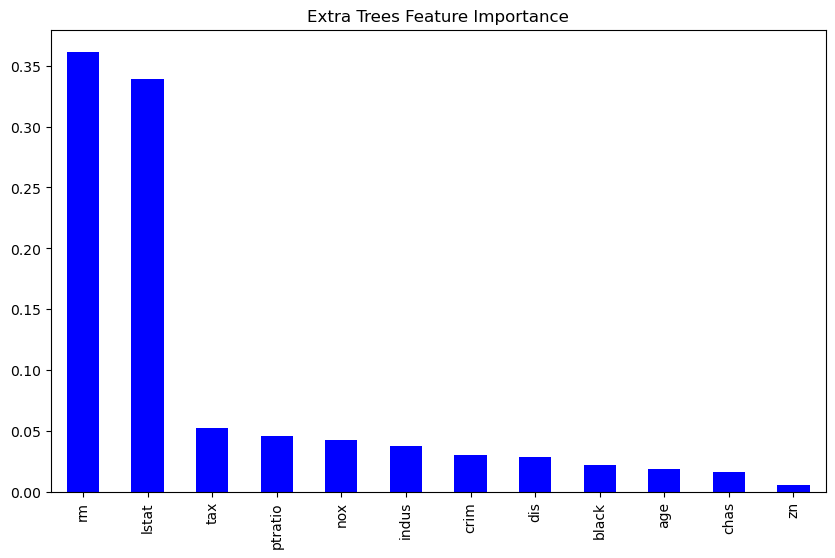

,cv_score,mse,r2,accuracy
Extra Trees,11.953132,9.857221,0.865584,0.865584


In [54]:
# Extra Trees

et = ExtraTreesRegressor(random_state=42)
et.fit(X_train, y_train)
et_feature_importance = pd.Series(et.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
et_feature_importance.plot(kind='bar', title='Extra Trees Feature Importance', color='blue')
plt.show()

et_results = evaluate_model(extra_trees, X_train, y_train, X_test, y_test)
et_results_df = pd.DataFrame([extra_trees_results], index=['Extra Trees'])
et_results_df

# Results

In [36]:
# Combined results from all the models
combined_results_df['accuracy'] = combined_results_df['accuracy'] * 100
combined_results_df

,cv_score,mse,r2,accuracy
Linear Regression,24.331714,26.470946,0.639035,63.903477
Decision Tree,32.003444,10.665588,0.854561,85.456105
Random Forest,14.935086,7.694171,0.895080,89.508013
XGBoost,13.979612,7.147339,0.902537,90.253688
Extra Trees,11.953132,9.857221,0.865584,86.558418


# Conclusion

Based on the above results, the best model for our prediction appears to be **XGBoost** with an accuracy of **90%**. 

- Lowest Mean Squared Error (MSE): XGBoost has the lowest MSE (7.147339), indicating that it has the least error in predicting the house prices compared to the other models.

- Highest R-squared (R²): XGBoost has the highest R² value (0.902537), meaning it explains the highest proportion of variance in the target variable (house prices).

- Highest Accuracy: XGBoost has the highest accuracy (90.253688%), indicating that its predictions are the closest to the actual values.

While the Extra Trees model also performs well with a low MSE and high R², XGBoost edges out with slightly better performance metrics, making it the best model among the ones we evaluated.